In [426]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7, 7]

In [427]:
df = pd.read_csv("td_data.csv")
print(df.to_string())

          Project Name Project Language  Monotonic Trend is Present TD Trend Type       p-value    Z-value
0                 etcd               go                        True        Upward  6.661160e-08   5.400079
1                 moby               go                        True        Upward  2.666682e-03   3.003757
2              express               js                        True        Upward  4.319212e-12   6.926320
3                  vue               js                        True        Upward  1.248867e-08   5.692918
4   kotlinx.coroutines           kotlin                        True        Upward  4.642926e-06   4.580308
5                 ktor           kotlin                        True        Upward  4.495424e-10   6.235777
6               django           python                        True        Upward  0.000000e+00  10.851454
7         scikit-learn           python                        True        Upward  1.065814e-14   7.731110
8                rails             ru

In [428]:
langz = list(df["Project Language"])
languages = []
for l in langz:
    if l not in languages:
        languages.append(l)

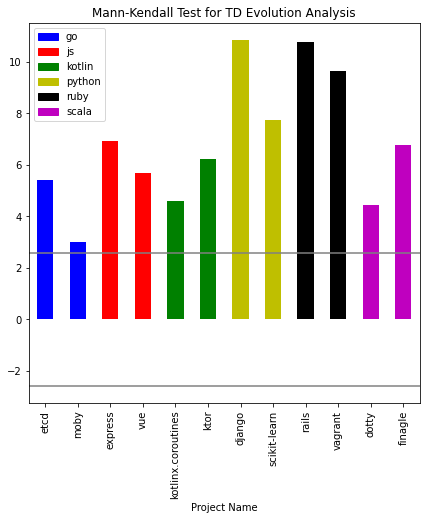

In [429]:
import matplotlib.patches as mpatches

n = len(list(df["Project Name"]))

available_colors = ('b', 'r', 'g', 'y', 'k', 'm')
colors = []
for c in available_colors:
    colors = colors + [c] * (n // len(languages))

patches = []
for i, c in enumerate(available_colors):
    patches.append(mpatches.Patch(color=c, label=languages[i]))

ax = df.plot.bar(x="Project Name", y="Z-value", rot=90, color=colors, title="Mann-Kendall Test for TD Evolution Analysis")
ax.legend(handles=patches)
ax.get_figure().savefig('mk_test_td.jpg')

plt.axhline(y=2.58, color='gray')
plt.axhline(y=-2.58, color='gray')


In [430]:
df = pd.read_csv("normalized_td_data.csv")
print(df.to_string())

          Project Name Project Language  Monotonic Trend is Present Normalized TD Trend Type       p-value   Z-value
0                 etcd               go                        True                   Upward  7.057150e-06  4.491958
1                 moby               go                       False                 No trend  1.331285e-01 -1.501879
2              express               js                        True                   Upward  1.736205e-03  3.131999
3                  vue               js                       False                 No trend  3.187331e-01 -0.997065
4   kotlinx.coroutines           kotlin                        True                 Downward  7.839543e-03 -2.658903
5                 ktor           kotlin                       False                 No trend  9.727655e-02 -1.658203
6               django           python                        True                 Downward  7.460699e-14 -7.479566
7         scikit-learn           python                        T

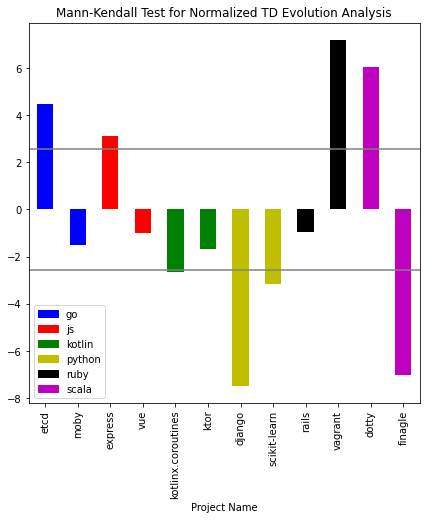

In [431]:
ax = df.plot.bar(x="Project Name", y="Z-value", rot=90, color=colors, title="Mann-Kendall Test for Normalized TD Evolution Analysis")
ax.legend(handles=patches)
ax.get_figure().savefig('mk_test_normalized_td.jpg')

plt.axhline(y=2.58, color='gray')
plt.axhline(y=-2.58, color='gray')